In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


In [21]:
df = pd.read_csv("../../seminars/S05/S05-hw-dataset.csv")

In [22]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [24]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [25]:
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Первичный анализ данных:
1) В датасете 3000 наблюдений и 17 признаков (включая client_id и default).
2) Большинство признаков — числовые, пропусков нет.
3) Целевая переменная default — бинарная (0/1).
4) Доля дефолтов около 41%, классы умеренно несбалансированы.
5) Явных аномалий или пропусков на этом этапе не выявлено

In [26]:
y = df["default"]
X = df.drop(columns=["client_id", "default"])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Проверка
print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(2400, 15) (600, 15)
default
0    0.589583
1    0.410417
Name: proportion, dtype: float64
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [33]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

y_dummy_pred = dummy_clf.predict(X_test)
y_dummy_proba = dummy_clf.predict_proba(X_test)[:, 1]

accuracy_dummy = accuracy_score(y_test, y_dummy_pred)
roc_auc_dummy = roc_auc_score(y_test, y_dummy_proba)

print(f"DummyClassifier: Accuracy = {accuracy_dummy:.3f}, ROC AUC = {roc_auc_dummy:.3f}")

DummyClassifier: Accuracy = 0.590, ROC AUC = 0.500


Baseline DummyClassifier:
1) DummyClassifier всегда предсказывает самый частый класс.
2) Accuracy = 0.590, ROC AUC = 0.500.
3) Модель не различает классы, служит точкой отсчёта.
4) Любая реальная модель должна показывать более высокие метрики.

In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

print("Лучшие параметры (GridSearchCV):", grid.best_params_)
print("Лучший CV ROC AUC:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

accuracy_logreg = accuracy_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_proba)

print(f"LogisticRegression (best): Accuracy = {accuracy_logreg:.3f}, ROC AUC = {roc_auc_logreg:.3f}")

# CV результаты по C
cv_results = pd.DataFrame(grid.cv_results_)
cv_summary = cv_results[["param_logreg__C", "mean_train_score", "std_train_score", "mean_test_score", "std_test_score"]]
cv_summary = cv_summary.sort_values("param_logreg__C").reset_index(drop=True)
display(cv_summary)

# Сохранение CV summary
os.makedirs("artifacts", exist_ok=True)
cv_summary.to_csv("artifacts/logreg_gridsearch_cv_summary.csv", index=False)
print("CV summary saved to artifacts/logreg_gridsearch_cv_summary.csv")

Лучшие параметры (GridSearchCV): {'logreg__C': 100.0}
Лучший CV ROC AUC: 0.8606625890118563
LogisticRegression (best): Accuracy = 0.802, ROC AUC = 0.876


,param_logreg__C,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.01,0.865629,0.002102,0.860293,0.009331
1,0.10,0.865764,0.002093,0.860605,0.009034
2,1.00,0.865797,0.002087,0.860659,0.008967
3,10.00,0.865796,0.002089,0.860659,0.008981
4,100.00,0.865796,0.002090,0.860663,0.008987


CV summary saved to artifacts/logreg_gridsearch_cv_summary.csv


LogisticRegression:
1) Логистическая регрессия с нормализацией признаков обучена на train.
2) Accuracy = 0.802, ROC AUC = 0.876.
3) Модель значительно превосходит baseline, умеет различать дефолты.
4) Оптимальный параметр регуляризации C = 100; признаки нормализованы, что помогает корректной работе модели.

ROC saved to: figures\roc_curve_logreg.png


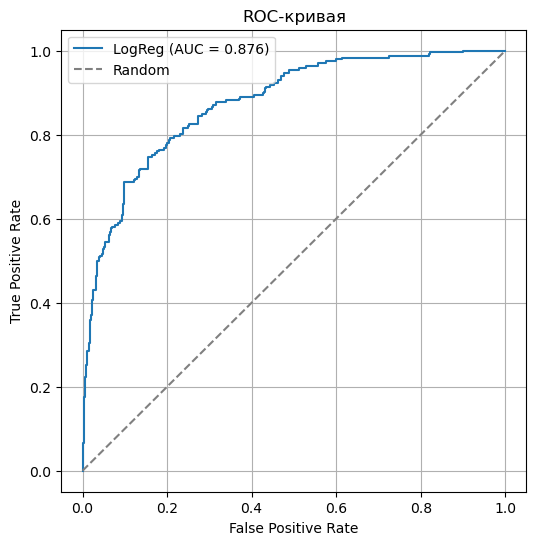

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'LogReg (AUC = {roc_auc_val:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)

os.makedirs("figures", exist_ok=True)
fig_path = os.path.join("figures", "roc_curve_logreg.png")
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print("ROC saved to:", fig_path)
plt.show()

In [37]:
results = pd.DataFrame({
    "Model": ["DummyClassifier", "LogisticRegression (best)"],
    "Accuracy": [accuracy_dummy, accuracy_logreg],
    "ROC AUC": [roc_auc_dummy, roc_auc_logreg]
})
display(results)

results.to_csv("artifacts/model_comparison.csv", index=False)
print("Model comparison saved to artifacts/model_comparison.csv")

,Model,Accuracy,ROC AUC
0,DummyClassifier,0.590000,0.500000
1,LogisticRegression (best),0.801667,0.875649


Model comparison saved to artifacts/model_comparison.csv


### Отчёт

1) DummyClassifier всегда предсказывает самый частый класс, поэтому его точность = 0.590, а ROC AUC = 0.500.  
2) LogisticRegression показывает точность = 0.802 и ROC AUC = 0.876, значительно превосходя baseline.  
3) Основное отличие в качестве: логистическая регрессия умеет различать дефолты, тогда как DummyClassifier нет.  
4) Accuracy выросла на 0.212, а ROC AUC — на 0.376, что показывает существенное улучшение предсказаний.  
5) Параметр регуляризации C = 100 позволяет контролировать переобучение; при этом качество модели стабильно высокое.
6) DummyClassifier полезен только как точка отсчёта, его метрики минимальны.  
7) LogisticRegression с нормализацией признаков — разумный выбор для задачи предсказания дефолтов.  
8) Модель сочетает высокую точность и хорошее различение классов, что делает её пригодной для практического применения.  
9) В дальнейшем можно экспериментировать с подбором C и другими признаками для дополнительного улучшения результатов.
